# TEXT Mining


<h3>Note: </h3>

- I have used python 3.7.2 version where I have install jupyter notebook to execute this assignment instead of using jupyter notebook (anaconda3).
- Because it was throwing an error while istalling wordcloud in jupyter notebook (anaconda3).

In [75]:
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_sm

     ------------------------------------ 400.7/400.7 MB 824.7 kB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     ---------------------------------------- 12.8/12.8 MB 3.8 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [76]:
!python -m spacy download en

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [77]:
!pip install wordcloud

In [78]:
!pip install textblob

In [23]:
#loading the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import spacy
import nltk
import warnings
warnings.filterwarnings('ignore')

In [24]:
tweet_data = pd.read_csv('Elon_musk.csv',encoding='ISO-8859-1')
tweet_data.drop('Unnamed: 0',axis=1,inplace=True)
tweet_data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


## Text preprocessing

In [25]:
#removing the leading and trailing characters
tweet_data = [text.strip() for text in tweet_data.Text]
#removing the empty strings
tweet_data = [text for text in tweet_data if text]

In [26]:
tweet_data[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [27]:
#joing all the texts
texts = ' '.join(tweet_data)
texts

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [28]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(strip_handles=True)
tokens=tokenizer.tokenize(texts)
tokens = str(tokens)
print(tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [29]:
#removing punctuations
for c in string.punctuation:
    tokens= tokens.replace(c,"")
    
tokens

'I x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gatew

In [30]:
# removing links from the text
import re
wo_links=re.sub(r'http\S+', '', tokens)
wo_links=wo_links.lower()
wo_links

'i x92 m an alien ray tracing on cyberpunk with hdr is nextlevel  have you tried it  great interview  doge is underestimated congratulations tesla china for amazing execution last year  now on to the next for even more   happy new year of the ox   frodo was the underdoge  all thought he would fail  himself most of all   haha thanks  indeed  tweets definitely do not represent realworld time allocation  the most entertaining outcome is the most likely just sent some just agree to do clubhouse with  it x92 s getting real bought some dogecoin for lil x  so he can be a toddler hodler he definitely has issues  but the sentencing seems a bit high thanks for fixing please unlock my account u0001f923 u0001f923 this is true power haha  any crypto wallet that won x92 t give you your private keys should be avoided at all costs your app sucks rt  nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission   yes once we can predict cash flow reasonabl

In [31]:
wo_n = re.sub("[0-9" "]+"," ",wo_links).lower() #removing numbers
wo_s = re.sub("[^A-Za-z" "]+"," ",wo_n).lower() #removing special characters
wo_s

'i x m an alien ray tracing on cyberpunk with hdr is nextlevel have you tried it great interview doge is underestimated congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox frodo was the underdoge all thought he would fail himself most of all haha thanks indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely just sent some just agree to do clubhouse with it x s getting real bought some dogecoin for lil x so he can be a toddler hodler he definitely has issues but the sentencing seems a bit high thanks for fixing please unlock my account u f u f this is true power haha any crypto wallet that won x t give you your private keys should be avoided at all costs your app sucks rt nasa has selected falcon heavy to launch the first two elements of the lunar gateway together on one mission yes once we can predict cash flow reasonably well starlink will ipo starlink is a s

In [32]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\CHINU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\CHINU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
ft = word_tokenize(wo_s)
print(ft)

['i', 'x', 'm', 'an', 'alien', 'ray', 'tracing', 'on', 'cyberpunk', 'with', 'hdr', 'is', 'nextlevel', 'have', 'you', 'tried', 'it', 'great', 'interview', 'doge', 'is', 'underestimated', 'congratulations', 'tesla', 'china', 'for', 'amazing', 'execution', 'last', 'year', 'now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'happy', 'new', 'year', 'of', 'the', 'ox', 'frodo', 'was', 'the', 'underdoge', 'all', 'thought', 'he', 'would', 'fail', 'himself', 'most', 'of', 'all', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'the', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'just', 'sent', 'some', 'just', 'agree', 'to', 'do', 'clubhouse', 'with', 'it', 'x', 's', 'getting', 'real', 'bought', 'some', 'dogecoin', 'for', 'lil', 'x', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'he', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'thanks', 'for', 'fixing', 'plea

In [34]:
#removing stopwords
without_sw = [word for word in ft if word not in stopwords.words('english')]
print(without_sw)

['x', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'thought', 'would', 'fail', 'haha', 'thanks', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'entertaining', 'outcome', 'likely', 'sent', 'agree', 'clubhouse', 'x', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'u', 'f', 'u', 'f', 'true', 'power', 'haha', 'crypto', 'wallet', 'x', 'give', 'private', 'keys', 'avoided', 'costs', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'yes', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'sta

In [35]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
lem=nlp(' '.join(without_sw))
print(lem)

x alien ray tracing cyberpunk hdr nextlevel tried great interview doge underestimated congratulations tesla china amazing execution last year next even happy new year ox frodo underdoge thought would fail haha thanks indeed tweets definitely represent realworld time allocation entertaining outcome likely sent agree clubhouse x getting real bought dogecoin lil x toddler hodler definitely issues sentencing seems bit high thanks fixing please unlock account u f u f true power haha crypto wallet x give private keys avoided costs app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission yes predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however spacex needs pass deep chasm negative cash flow next year lowest cost per ton carbon sequestered net value product made must scalable g x meant price countries difference taxes shipping intended earth may ideas apply mars u f u f xprize team manage 

In [36]:
simple_words=[token.lemma_ for token in lem]
simple_words

['x',
 'alien',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'try',
 'great',
 'interview',
 'doge',
 'underestimated',
 'congratulation',
 'tesla',
 'china',
 'amazing',
 'execution',
 'last',
 'year',
 'next',
 'even',
 'happy',
 'new',
 'year',
 'ox',
 'frodo',
 'underdoge',
 'think',
 'would',
 'fail',
 'haha',
 'thank',
 'indeed',
 'tweet',
 'definitely',
 'represent',
 'realworld',
 'time',
 'allocation',
 'entertain',
 'outcome',
 'likely',
 'send',
 'agree',
 'clubhouse',
 'x',
 'get',
 'real',
 'buy',
 'dogecoin',
 'lil',
 'x',
 'toddler',
 'hodler',
 'definitely',
 'issue',
 'sentencing',
 'seem',
 'bit',
 'high',
 'thank',
 'fix',
 'please',
 'unlock',
 'account',
 'u',
 'f',
 'u',
 'f',
 'true',
 'power',
 'haha',
 'crypto',
 'wallet',
 'x',
 'give',
 'private',
 'key',
 'avoid',
 'cost',
 'app',
 'suck',
 'rt',
 'nasa',
 'select',
 'falcon',
 'heavy',
 'launch',
 'first',
 'two',
 'element',
 'lunar',
 'gateway',
 'together',
 'one',
 'mission',
 'yes',
 'predict

In [37]:
#converting into vectors using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
tf = CountVectorizer()
vectors = tf.fit_transform(simple_words)

In [38]:
print(tf.vocabulary_)

{'alien': 85, 'ray': 2197, 'trace': 2844, 'cyberpunk': 642, 'hdr': 1225, 'nextlevel': 1818, 'try': 2875, 'great': 1177, 'interview': 1418, 'doge': 767, 'underestimated': 2918, 'congratulation': 551, 'tesla': 2757, 'china': 462, 'amazing': 106, 'execution': 931, 'last': 1500, 'year': 3127, 'next': 1817, 'even': 905, 'happy': 1209, 'new': 1815, 'ox': 1937, 'frodo': 1081, 'underdoge': 2917, 'think': 2782, 'would': 3113, 'fail': 965, 'haha': 1198, 'thank': 2768, 'indeed': 1359, 'tweet': 2890, 'definitely': 681, 'represent': 2266, 'realworld': 2213, 'time': 2803, 'allocation': 88, 'entertain': 875, 'outcome': 1917, 'likely': 1555, 'send': 2408, 'agree': 69, 'clubhouse': 491, 'get': 1138, 'real': 2208, 'buy': 384, 'dogecoin': 769, 'lil': 1556, 'toddler': 2814, 'hodler': 1271, 'issue': 1436, 'sentencing': 2413, 'seem': 2400, 'bit': 301, 'high': 1258, 'fix': 1029, 'please': 2032, 'unlock': 2942, 'account': 27, 'true': 2870, 'power': 2068, 'crypto': 625, 'wallet': 3025, 'give': 1149, 'private':

In [39]:
#now using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
td = TfidfVectorizer()
vectors1 = td.fit_transform(simple_words)

In [40]:
feature_names = tf.get_feature_names()
dense = vectors1.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)
df

,ab,aber,able,abo,aboard,abort,absence,absolute,absolutely,absorb,...,yolt,york,young,yup,zealand,zenit,zero,zip,zon,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
w_list = ' '.join(df)

In [44]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='black',
                      width=2000,
                      height=1600).generate(w_list)

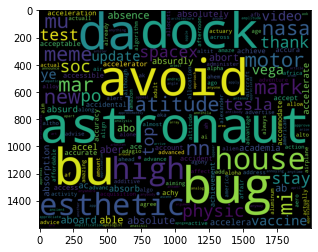

In [45]:
plt.imshow(wordcloud);

In [46]:
for i in lem[0:10]:
    print(i, i.pos_)

x PUNCT
alien ADJ
ray NOUN
tracing VERB
cyberpunk ADJ
hdr NOUN
nextlevel NOUN
tried VERB
great ADJ
interview NOUN


In [48]:
#Filtering for nouns and verbs 
nouns_verbs = [token.text for token in lem if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs)

['ray', 'tracing', 'hdr', 'nextlevel', 'tried', 'interview', 'congratulations', 'tesla', 'execution', 'year', 'year', 'thought', 'fail', 'haha', 'thanks', 'tweets', 'represent', 'allocation', 'entertaining', 'outcome', 'sent', 'agree', 'clubhouse', 'getting', 'bought', 'dogecoin', 'toddler', 'hodler', 'issues', 'sentencing', 'seems', 'bit', 'thanks', 'fixing', 'power', 'give', 'keys', 'avoided', 'costs', 'sucks', 'selected', 'falcon', 'launch', 'elements', 'gateway', 'mission', 'predict', 'cash', 'flow', 'starlink', 'starlink', 'endeavor', 'needs', 'pass', 'chasm', 'cash', 'flow', 'year', 'cost', 'ton', 'carbon', 'sequestered', 'value', 'product', 'made', 'scalable', 'meant', 'price', 'countries', 'difference', 'taxes', 'shipping', 'intended', 'earth', 'ideas', 'apply', 'team', 'manage', 'carbon', 'capture', 'prize', 'tesla', 'receives', 'stock', 'comp', 'stock', 'options', 'take', 'table', 'missing', 'work', 'go', 'seem', 'bit', 'appears', 'fixed', 'coins', 'unit', 'time', 'launch', '

In [49]:
#Counting tokens again
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0).tolist()[0]
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']

wf_df[0:10]

,word,count
0,tesla,85
1,launch,36
2,people,32
3,make,32
4,year,30
5,starship,30
6,production,30
7,need,28
8,dragon,25
9,coming,25


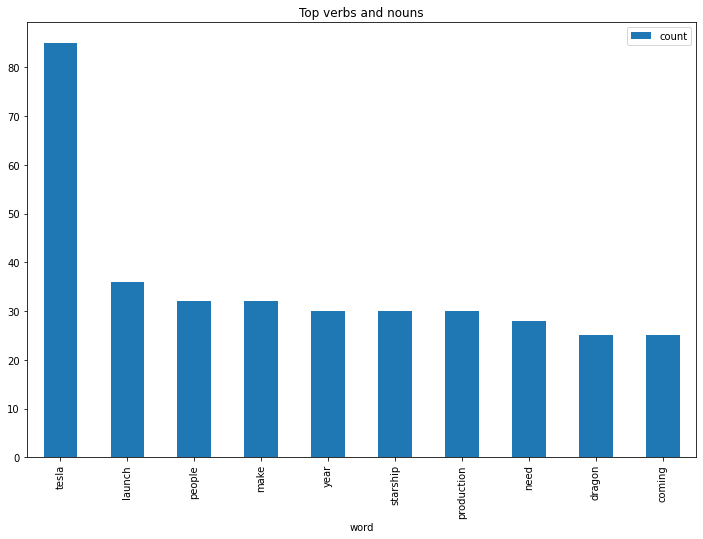

In [50]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns');

# Sentiment Analysis

In [53]:
import pandas as pd
from textblob import TextBlob
import re

In [54]:
def get_cleanText(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)#removes username
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\S+','',text)# removes hyperlink
    text=  re.sub("[^A-Za-z" "]+"," ",text) #removes special characters
    return text

In [55]:
tweet_data = pd.DataFrame(tweet_data,columns=['text'])

In [56]:
tweet_data

,text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [57]:
tweet_data['clean_text'] = tweet_data['text'].apply(get_cleanText)

In [58]:
tweet_data['clean_text']

0                                            I m an alien
1        AA Carmack Ray tracing on Cyberpunk with HDR ...
2                                        Great interview 
3                                  Doge is underestimated
4        Congratulations Tesla China for amazing execu...
                              ...                        
1994     True it sounds so surreal but the negative pr...
1995     Make sure to read ur terms amp conditions bef...
1996                                       Samwise Gamgee
1997                    Altho Dumb and Dumber is U F U F 
1998                              Progress update August 
Name: clean_text, Length: 1999, dtype: object

In [59]:
#function to get subjectivity
def get_Subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [60]:
#function to get polarity(positive or negative)
def get_Polarity(text):
    return TextBlob(text).sentiment.polarity

In [61]:
tweet_data['Subjectivity'] = tweet_data['clean_text'].apply(get_Subjectivity)
tweet_data['Polarity'] = tweet_data['clean_text'].apply(get_Polarity)

In [62]:
tweet_data

,text,clean_text,Subjectivity,Polarity
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800000
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000000
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275000
...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative pr...,0.508333,0.111111
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions bef...,0.888889,0.500000
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,0.000000,0.000000
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F,0.500000,-0.375000


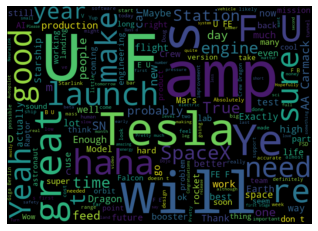

In [63]:
#plotting the tweet
allwords = ' '.join([word for word in tweet_data['clean_text']])
wc = WordCloud(width=700,height=500,random_state=4,max_font_size=150).generate(allwords)

plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show();

In [64]:
#function to compute whether a tweet is positive or negative
def get_score(score):
    score = float(score)
    if (score < 0):
        return 'Negative'
    elif (score == 0):
        return 'Neutral'
    elif score > 0:
        return 'Positive'
    

In [65]:
tweet_data['Sentiment']= tweet_data['Polarity'].apply(get_score)
tweet_data

,text,clean_text,Subjectivity,Polarity,Sentiment
0,@kunalb11 Im an alien,I m an alien,0.750000,-0.250000,Negative
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,AA Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,@joerogan @Spotify Great interview!,Great interview,0.750000,0.800000,Positive
3,@gtera27 Doge is underestimated,Doge is underestimated,0.000000,0.000000,Neutral
4,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,0.366667,0.275000,Positive
...,...,...,...,...,...
1994,"@flcnhvy True, it sounds so surreal, but the n...",True it sounds so surreal but the negative pr...,0.508333,0.111111,Positive
1995,@PPathole Make sure to read ur terms &amp; con...,Make sure to read ur terms amp conditions bef...,0.888889,0.500000,Positive
1996,@TeslaGong @PPathole Samwise Gamgee,Samwise Gamgee,0.000000,0.000000,Neutral
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...,Altho Dumb and Dumber is U F U F,0.500000,-0.375000,Negative


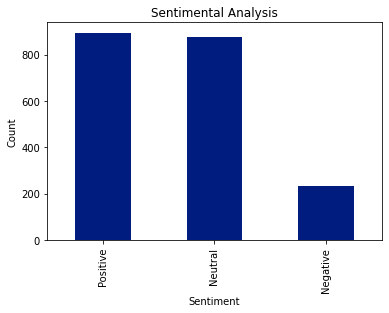

In [66]:
plt.title("Sentimental Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.style.use('seaborn-dark-palette')
tweet_data['Sentiment'].value_counts().plot(kind='bar');

In [69]:
#all positive tweets
positive=tweet_data[tweet_data['Polarity']>0]
positive['text']

2                     @joerogan @Spotify Great interview!
4       @teslacn Congratulations Tesla China for amazi...
5       Happy New Year of the Ox! https://t.co/9WFKMYu2oj
7          @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8       @flcnhvy @anonyx10 Indeed! Tweets definitely d...
                              ...                        
1986                   Best use of the term Full Stack?
1987    @PPathole @IheartTesla For sure. This is both ...
1991    @IheartTesla No easy way to answer this in a t...
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
Name: text, Length: 894, dtype: object

In [70]:
#all negative tweets
negatives=tweet_data[tweet_data['Polarity']<0]
negatives['text']

0                                  @kunalb11 Im an alien
21                          @freewalletorg Your app sucks
25      @RationalEtienne @Adamklotz_ Starlink is a sta...
26      @RationalEtienne @Adamklotz_ SpaceX needs to p...
32      @SRuhle Everyone at Tesla receives stock. \n\n...
                              ...                        
1943    @teslaownersSV @engineers_feed The strength &a...
1949    @katlinegrey Reusability is essential. A rocke...
1958    @jgrano305 @TeslaratiTeam @Teslarati We have r...
1989        @buzzindelhi Sorry, should hopefully be soon!
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
Name: text, Length: 231, dtype: object

In [71]:
#getting the percentage of positive tweets
ptweets = positive['text']
score = round(ptweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of positive tweets is {} %.".format(score))

The percentage of positive tweets is 45 %.


In [72]:
ntweets = negatives['text']
scoren = round(ntweets.shape[0]/tweet_data.shape[0] *100)
print("The percentage of negative tweets is {} %.".format(scoren))

The percentage of negative tweets is 12 %.


In [73]:
neutral = tweet_data[tweet_data['Polarity']==0]
neutral = neutral['text']
nn = round(neutral.shape[0]/tweet_data.shape[0] *100)
print("The percentage of Neutral tweets is {} %.".format(nn))

The percentage of Neutral tweets is 44 %.
